In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Load data
try:
    df = pd.read_csv('../Week3/bow_features_cleaned.csv')
    print("File berhasil dimuat.")
except FileNotFoundError:
    print("File checkpoint tidak ditemukan.")

File berhasil dimuat.


In [4]:
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Buat matriks TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df)

# Tampilkan hasilnya dalam bentuk DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("\n--- Representasi TF-IDF (10 Ulasan Pertama) ---")
display(tfidf_df.iloc[:10, :15])


--- Representasi TF-IDF (10 Ulasan Pertama) ---


,aamiin,abal,abdet,abis,ac,acak,account,accountnya,acount,ad,adain,admin,adminnya,adu,ae
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 5. Simpan hasil
TFIDF_FILE = 'tfidf.csv'
tfidf_df.to_csv(TFIDF_FILE, index=False)
print(f"\nMatriks TF-IDF berhasil dibuat dan disimpan sebagai '{TFIDF_FILE}'.")
print(f"Ukuran matriks: {tfidf_matrix.shape[0]} ulasan, {tfidf_matrix.shape[1]} kata unik.")


Matriks TF-IDF berhasil dibuat dan disimpan sebagai 'tfidf.csv'.
Ukuran matriks: 1686 ulasan, 1686 kata unik.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
try:
    # Load data fitur (X) dari BoW yang sudah bersih
    X = pd.read_csv('../Week3/bow_features_cleaned.csv')
    
    # Muat data asli untuk mendapatkan label sentimen (y)
    df_labels = pd.read_csv('../Week2/df_rosaliarev_custom_stopwords.csv')
    y = df_labels['sentiment']
    
    # Menghapus baris di mana sentimen adalah NaN (jika ada)
    # dan menyelaraskan X dan y
    valid_indices = y.notna()
    y = y[valid_indices]
    X = X[valid_indices]

    print("Data fitur (X) dan target (y) berhasil dimuat dan diselaraskan.")
    print(f"Jumlah data yang akan digunakan: {len(y)} ulasan.")

except FileNotFoundError as e:
    print(f"Error: File tidak ditemukan. {e}")
    # Hentikan eksekusi jika file tidak ada
    exit()

Data fitur (X) dan target (y) berhasil dimuat dan diselaraskan.
Jumlah data yang akan digunakan: 3928 ulasan.


In [8]:
# Membagi Data
# Kita bagi data menjadi 80% untuk melatih model dan 20% untuk menguji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, # random_state agar hasil pembagian data selalu sama
    stratify=y # stratify untuk memastikan proporsi sentimen sama di data train & test
)

print(f"\nData dibagi menjadi {len(X_train)} data latih dan {len(X_test)} data uji.")


Data dibagi menjadi 3142 data latih dan 786 data uji.


In [9]:
# Melatih Model Naive Bayes
# Kita menggunakan MultinomialNB yang cocok
model = MultinomialNB()
model.fit(X_train, y_train)

print("\nModel Naive Bayes berhasil dilatih.")


Model Naive Bayes berhasil dilatih.



--- Hasil Evaluasi Model ---
Akurasi Model: 76.84%

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.77      0.79      0.78       336
      Netral       0.28      0.10      0.15        68
     Positif       0.80      0.87      0.83       382

    accuracy                           0.77       786
   macro avg       0.62      0.59      0.59       786
weighted avg       0.74      0.77      0.75       786


Confusion Matrix:


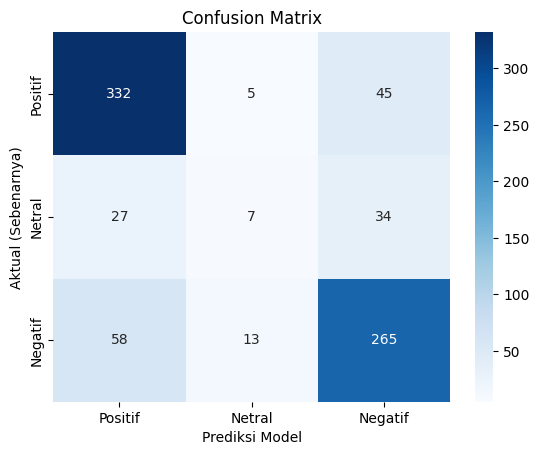

In [10]:
# Mengevaluasi Model
# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Hasil Evaluasi Model ---")
print(f"Akurasi Model: {accuracy:.2%}")

# Tampilkan Laporan Klasifikasi (Precision, Recall, F1-Score)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Tampilkan Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=['Positif', 'Netral', 'Negatif'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Positif', 'Netral', 'Negatif'], 
            yticklabels=['Positif', 'Netral', 'Negatif'])
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual (Sebenarnya)')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Mempersiapkan Data
try:
    # Mengganti sumber data fitur (X) menjadi hasil TF-IDF
    X_tfidf = pd.read_csv('tfidf.csv')
    
    # Muat data asli untuk mendapatkan label sentimen (y)
    df_labels = pd.read_csv('../Week2/df_rosaliarev_custom_stopwords.csv')
    y_tfidf = df_labels['sentiment']
    
    # Menyelaraskan X dan y (menghapus baris NaN jika ada)
    valid_indices = y_tfidf.notna()
    y_tfidf = y_tfidf[valid_indices]
    X_tfidf = X_tfidf[valid_indices]

    print("Data fitur (TF-IDF) dan target (y) berhasil dimuat.")
    print(f"Jumlah data yang akan digunakan: {len(y_tfidf)} ulasan.")

except FileNotFoundError as e:
    print(f"Error: File tidak ditemukan. {e}")
    # Hentikan eksekusi jika file tidak ada
    exit()

Data fitur (TF-IDF) dan target (y) berhasil dimuat.
Jumlah data yang akan digunakan: 3928 ulasan.


C:\Users\Wede\AppData\Local\Temp\ipykernel_46492\1160514609.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_tfidf = X_tfidf[valid_indices]


In [16]:
# Membagi Data 
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_tfidf, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_tfidf
)

print(f"\nData dibagi menjadi {len(X_train)} data latih dan {len(X_test)} data uji.")

ValueError: Found input variables with inconsistent numbers of samples: [1686, 3928]

In [ ]:
# Melatih Model Naive Bayes dengan data TF-IDF
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train, y_train)

print("\nModel Naive Bayes (TF-IDF) berhasil dilatih.")

In [ ]:
# Mengevaluasi Model
y_pred_tfidf = model_tfidf.predict(X_test)

# Hitung akurasi
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"\n--- Hasil Evaluasi Model (TF-IDF) ---")
print(f"Akurasi Model: {accuracy_tfidf:.2%}")

# Tampilkan Laporan Klasifikasi
print("\nLaporan Klasifikasi (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))

# Tampilkan Confusion Matrix
print("\nConfusion Matrix (TF-IDF):")
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=['Positif', 'Netral', 'Negatif'])
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Positif', 'Netral', 'Negatif'], 
            yticklabels=['Positif', 'Netral', 'Negatif'])
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual (Sebenarnya)')
plt.title('Confusion Matrix (TF-IDF)')
plt.show()